## Here I have tried to manipulate the missing data, this part is only about NaN, Outliers, Imputers, and Linear Regression.
### The visualization part is in another notebook because it makes me unfocused with the real problem.
#### I have dropped the gender column, and tried varius ways to impute the data then, the results of each imputer isas the following:

#### - KNN Imputation with appliyng the logarithm of the each column gave a variance score of 0.63, and a variance score of 0.6 with the normal columns

#### - Multivariate feature imputation with appliyng the logarithm of the each column gave a variance score of 0.60, and a variance score of 0.56 with the normal columns


#### - simple imputation with appliyng the logarithm of the each column gave a variance score of 0.62, and a variance score of 0.57 with the normal columns

### So far, the best imputation technique is the KNN with the Logarithm.
#### However, the Mean squared error really differes from the log data and the normal one as:
#### -Mean squared error in Log data = 0.11
#### -Mean squared error in normal data = 3496112066.82

In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
import numpy.random as rnd
import statsmodels.api as sm



In [400]:
data = pd.read_csv('//Users//omniaelmenshawy//Desktop//machinfy///housing.csv', sep=',', encoding='utf-8')
data.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY,male
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY,female


In [401]:
data = data.drop_duplicates()

In [402]:
data.dropna(subset = ["housing_median_age"], inplace=True)

In [403]:
data.dropna(subset = ["population"], inplace=True)

In [404]:
#data['households'].std()

In [405]:
del data['gender']

In [406]:
data['households'].replace('no' , "NaN",inplace=True)

In [407]:
data["households"]=data['households'].astype(float)

In [408]:
data.pivot_table(index = 'ocean_proximity', aggfunc='size')

ocean_proximity
<1H OCEAN     9011
INLAND        6413
ISLAND           5
NEAR BAY      2265
NEAR OCEAN    2648
dtype: int64

In [409]:
data['ocean_proximity'].replace('INLAND' , "1",inplace=True)
data['ocean_proximity'].replace('ISLAND' , "2",inplace=True)
data['ocean_proximity'].replace('NEAR BAY' , "3",inplace=True)
data['ocean_proximity'].replace('NEAR OCEAN' , "4",inplace=True)
data['ocean_proximity'].replace('<1H OCEAN' , "5",inplace=True)


In [410]:
data["ocean_proximity"]=data['ocean_proximity'].astype(float)

In [411]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20342.000000,20342.000000,20342.000000,20342.000000,15677.000000,20342.000000,16173.000000,17589.000000,20342.000000,20342.000000
mean,-119.560938,35.619899,28.667732,2629.938944,539.746763,1423.440566,500.629877,3.937762,206791.325828,3.385360
std,2.005159,2.131449,12.586270,2171.383930,420.143893,1128.634720,378.533141,1.945259,115292.337490,1.736376
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1446.250000,296.000000,787.000000,280.000000,2.596400,119900.000000,1.000000
50%,-118.470000,34.240000,29.000000,2125.000000,435.000000,1166.000000,409.000000,3.585900,179400.000000,4.000000
75%,-118.000000,37.700000,37.000000,3141.000000,651.000000,1724.000000,607.000000,4.826600,264600.000000,5.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,5.000000


In [412]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer

### KNN IMPUTER

In [413]:
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
data['households'] = knn_imputer.fit_transform(data[['households']])

In [414]:
data['households'].isnull().sum()

0

In [415]:
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
data['total_bedrooms'] = knn_imputer.fit_transform(data[['total_bedrooms']])

In [416]:
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
data['median_income'] = knn_imputer.fit_transform(data[['median_income']])

In [389]:
#df['median_income'].isnull().sum()

### Multivariate feature imputation

In [115]:
mice_imputer = IterativeImputer()
data['households'] = mice_imputer.fit_transform(data[['households']])

In [116]:
mice_imputer = IterativeImputer()
data['median_income'] = mice_imputer.fit_transform(data[['median_income']])

In [117]:
mice_imputer = IterativeImputer()
data['total_bedrooms'] = mice_imputer.fit_transform(data[['total_bedrooms']])

### Simple Imputer


In [188]:
from sklearn.impute import SimpleImputer
#housholds
imputer = SimpleImputer(missing_values=np.nan)
imputer.fit(data.iloc[:,6:7])
data.iloc[:,6:7] = imputer.transform(data.iloc[:,2:3])


In [189]:
#total bedrooms
imputer = SimpleImputer(missing_values=np.nan)
imputer.fit(data.iloc[:,4:5])
data.iloc[:,4:5] = imputer.transform(data.iloc[:,4:5])

In [190]:
#median_income
imputer = SimpleImputer(missing_values=np.nan)
imputer.fit(data.iloc[:,7:8])
data.iloc[:,7:8] = imputer.transform(data.iloc[:,7:8])

### Features and Null

In [417]:
num_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']

In [418]:
data['rooms_per_household']=data['total_rooms']/data['households']
data['bedrooms_per_room']=data['total_bedrooms']/data['total_rooms']
data['population_per_household']=data['population']/data['households']

In [419]:
def get_null_count(data):
    for i in data.columns:
        print(i,': ',len(data[data[i].isnull()][i]))

In [420]:
get_null_count(data)

longitude :  0
latitude :  0
housing_median_age :  0
total_rooms :  0
total_bedrooms :  0
population :  0
households :  0
median_income :  0
median_house_value :  0
ocean_proximity :  0
rooms_per_household :  0
bedrooms_per_room :  0
population_per_household :  0


### Handeling Outliers

In [421]:
z = np.abs(stats.zscore(data))
print(z)

[[1.33112983 1.06038506 0.97984321 ... 0.54178656 0.23186417 0.04708969]
 [1.32614257 1.05100154 0.60922896 ... 0.29256411 0.21222103 0.08955483]
 [1.33611709 1.04630978 1.85383289 ... 0.97743351 0.26829867 0.02358507]
 ...
 [0.82741678 1.78760772 0.92704339 ... 0.05240798 0.08552326 0.06899524]
 [0.87728936 1.78760772 0.84758978 ... 0.01099167 0.07545288 0.08828126]
 [0.8373913  1.75945716 1.006497   ... 0.0359797  0.07269505 0.0412374 ]]


In [422]:
Q1 = data.quantile(0.20)
Q3 = data.quantile(0.80)
IQR = Q3 - Q1
print(IQR)

longitude                        4.100000
latitude                         3.940000
housing_median_age              23.000000
total_rooms                   2180.800000
total_bedrooms                 338.000000
population                    1195.800000
households                     324.000000
median_income                    2.448200
median_house_value          182000.000000
ocean_proximity                  4.000000
rooms_per_household              2.303347
bedrooms_per_room                0.103373
population_per_household         1.294327
dtype: float64


In [423]:
#print(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

In [424]:
data = data[(z < 3).all(axis=1)]

In [425]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(17055, 13)

### taking the Log of the data:

In [426]:
data2 = data.copy()

In [427]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [428]:
data2['LOG_MHV'] = np.log(data['median_house_value'])
data2['LOG_HMA'] = np.log(data['housing_median_age'])
data2['LOG_TR'] = np.log(data['total_rooms'])
data2['LOG_TB'] = np.log(data['total_bedrooms'])
data2['LOG_P'] = np.log(data['population'])
data2['LOG_H'] = np.log(data['households'])
data2['LOG_MI'] = np.log(data['median_income'])
data2['LOG_OP'] = np.log(data['ocean_proximity'])
                               

In [429]:
data2.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household', 'LOG_MHV', 'LOG_HMA',
       'LOG_TR', 'LOG_TB', 'LOG_P', 'LOG_H', 'LOG_MI', 'LOG_OP'],
      dtype='object')

In [430]:
df = data2[['longitude', 'latitude','LOG_MHV', 'LOG_HMA',
       'LOG_TR', 'LOG_TB', 'LOG_P', 'LOG_H', 'LOG_MI', 'LOG_OP']]

### Testing Log Data

In [431]:
x = df.drop(['LOG_MHV'],axis = 1).values
y = df["LOG_MHV"].values

In [432]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 40)

In [433]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_predict = lr.predict(x_test)

In [434]:
y_predict = lr.predict(x_test)

In [435]:
lr.score(x_train, y_train)

0.6557573759264488

In [436]:
lr.score(x_test,y_test)

0.6334684825225946

In [437]:
100*x_test.shape[0]/x_train.shape[0]

33.33593933234305

In [438]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lr.score(x_test, y_test))

Variance score: 0.63


In [439]:
test_residuals = y_test - y_predict
test_residuals

array([ 0.33240014, -0.11862534, -0.25903514, ...,  0.15989842,
        0.27169886, -0.13604315])

In [440]:
# The mean squared error
print("Mean squared error: %.2f" % np.mean((lr.predict(x_test) - y_test) ** 2))


Mean squared error: 0.11


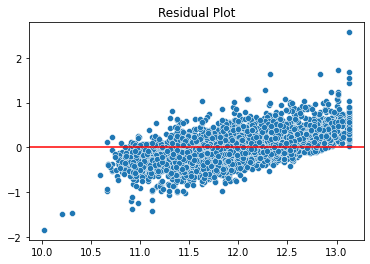

In [441]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red')
plt.title('Residual Plot');

In [442]:
x = data.drop(['median_house_value'],axis = 1).values
y = data['median_house_value'].values

In [443]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 40)

In [444]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_predict = lr.predict(x_test)

In [445]:
y_predict = lr.predict(x_test)

In [446]:
lr.score(x_train, y_train)

0.6179896911766637

In [447]:
lr.score(x_test,y_test)

0.5958424714863233

In [448]:
100*x_test.shape[0]/x_train.shape[0]

33.33593933234305

In [449]:
print('Coefficients: \n', lr.coef_)


Coefficients: 
 [-3.75939692e+04 -3.63647486e+04  1.28475343e+03 -8.92921578e-01
 -9.49954984e+01 -2.99999350e+01  2.28206179e+02  3.40335571e+04
  1.08431327e+04  2.40296431e+04  2.95989103e+05 -2.26483886e+04]


In [450]:
# The mean squared error
print("Mean squared error: %.2f" % np.mean((lr.predict(x_test) - y_test) ** 2))


Mean squared error: 4791389058.57


In [451]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lr.score(x_test, y_test))

Variance score: 0.60


In [452]:
lr.score(x_train, y_train)

0.6179896911766637

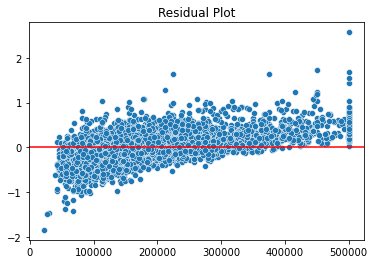

In [453]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red')
plt.title('Residual Plot');